In [4]:
import pandas as pd
import math
import os
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from IPython.display import display
import pandas as pd
from pickle import loads, dumps
from joblib import Memory
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors, Lipinski, Crippen, rdMolDescriptors, GraphDescriptors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
df = pd.read_csv('/home/danylo/Desktop/Master/Data/reactions_clean.csv')
df.head()

ID  \
0  ord-e02e86c6722649c19d1c4d8e45a67838   
1  ord-fbf2878a83214f49ba4bde529b07025e   
2  ord-6b762dd0417b4f4e8cfeb37ae62400fd   
3  ord-bbb9d39e511b426daffd167319c568a7   
4  ord-f24b5aa0f9364497b2b28cd16abe3863   

                                      ReactionSmiles      Yield  \
0  Br[C:2]1[CH:9]=[CH:8][C:5]([C:6]#[N:7])=[CH:4]...  93.000000   
1  [C:1]([C:3]1[CH:8]=[CH:7][C:6](B(O)O)=[CH:5][C...  30.000000   
2  [CH2:1]([OH:10])[C:2]([CH2:4][O:5]P(O)(O)=O)=[...  30.000000   
3  O1CCCC1.[CH3:6][C:7]([N:16]1[CH2:20][C:19]([CH...  87.599998   
4  [CH3:1][C:2]([N:10]1[CH2:14][CH:13]([CH2:15]Br...  71.000000   

                                 ReactionSmilesClean    Year  
0  N#CC1=CC=C(Br)C=C1.CCCCCC.[Li]CCCC.COB(OC)OC.C...  1994.0  
1  N#CC1=CC=C(B(O)O)C=C1.CCCCCCCSC1=CC=C(Br)C=C1....  1994.0  
2  O=C(CO)COP(=O)(O)O.[N-]=[N+]=NC(C=O)CO.[OH-].[...  1994.0  
3  C1CCOC1.CC1(CBr)CN(C(C)(C)C2=CC(Cl)=CC=C2)C(=O...  1994.0  
4  CC(C)(C1=CC=CC=C1)N1CC(CBr)C(C2=CC(F)=CC=C2)C1...  1994.0

In [6]:
df = pd.read_csv('/home/danylo/Desktop/Master/Data/output_reaction_ID_2.csv')
df.head()

Amide bond formation  formylation  \
0  ord-2180f07e6066477c8caf5d437094ddc0          NaN   
1  ord-7642c410d47141fbbc91fb260f408e07          NaN   
2  ord-2508a4b70fab40288141c5d22c12d300          NaN   
3  ord-a9803dbd2d53484bb24bae76e21a499d          NaN   
4  ord-b12c8c5620fe4fe5a7a87a809b4c8713          NaN   

                              amination                    C-C bond formation  
0  ord-abf46291c3314d12926a89aa25c09b6e  ord-fbf2878a83214f49ba4bde529b07025e  
1  ord-1564cc5c075442158bd058c9e8d6773a  ord-6b762dd0417b4f4e8cfeb37ae62400fd  
2  ord-0ecb271c7125481d8b349661e46a35f8  ord-bbb9d39e511b426daffd167319c568a7  
3  ord-5e64d2c66f264066b8be6c5a5670ef1b  ord-f24b5aa0f9364497b2b28cd16abe3863  
4  ord-da1018476a9342e09a2c152fb4e973fb  ord-1e058ed1b0fb4efd8219793abcef1c91

In [8]:
df2 = pd.read_csv('/home/danylo/Desktop/Master/Data/output_reaction_ID_3.csv')
df2.head()

Amide bond formation  formylation  \
0  ord-f6231d48438c48e9bcac8df833a66000          NaN   
1  ord-3512f20f28114edd83377bf829793810          NaN   
2  ord-35d40321156645dc8436b51879380e59          NaN   
3  ord-dc6c70980c244159a679803b2de54c85          NaN   
4  ord-5026c7014baf43b0b1a7fec0048e73b5          NaN   

                              amination                    C-C bond formation  
0  ord-a86183b2e81446a48c19fe557b7c78e6  ord-7913f8f85e334f5890e4b95a90434cf0  
1  ord-a3055df4593e451e906591fd3c67a860  ord-93b958b1e41240999af54b7976e830c9  
2  ord-d293bd4ca76749ac90e7868e865060e6  ord-a86183b2e81446a48c19fe557b7c78e6  
3  ord-b700dc0efe0344ccb6b5f9524f82efbd  ord-b6c5860b1e9b4a00b921c599e6b0883c  
4  ord-a5d889398a3e44c097f5939efc13c16c  ord-85d9d9830b824c02b2567ddfdce07f9d

In [9]:
combined_df = pd.concat((df, df2), ignore_index=True)

In [12]:
print(len(combined_df["C-C bond formation"].unique()))

147927


In [ ]:
combined_df.dropna()

In [ ]:
combined_df.head()

In [10]:
df_main = pd.read_csv('/home/danylo/Desktop/Master/Data/reactions_clean.csv')
df.head()

Amide bond formation  formylation  \
0  ord-2180f07e6066477c8caf5d437094ddc0          NaN   
1  ord-7642c410d47141fbbc91fb260f408e07          NaN   
2  ord-2508a4b70fab40288141c5d22c12d300          NaN   
3  ord-a9803dbd2d53484bb24bae76e21a499d          NaN   
4  ord-b12c8c5620fe4fe5a7a87a809b4c8713          NaN   

                              amination                    C-C bond formation  
0  ord-abf46291c3314d12926a89aa25c09b6e  ord-fbf2878a83214f49ba4bde529b07025e  
1  ord-1564cc5c075442158bd058c9e8d6773a  ord-6b762dd0417b4f4e8cfeb37ae62400fd  
2  ord-0ecb271c7125481d8b349661e46a35f8  ord-bbb9d39e511b426daffd167319c568a7  
3  ord-5e64d2c66f264066b8be6c5a5670ef1b  ord-f24b5aa0f9364497b2b28cd16abe3863  
4  ord-da1018476a9342e09a2c152fb4e973fb  ord-1e058ed1b0fb4efd8219793abcef1c91

In [11]:
df_temp1 = df_main[df_main['ID'].isin(combined_df["Amide bond formation"])]

# Select only the required columns
df_Amide = df_temp1[['Year', 'ReactionSmiles', 'ReactionSmilesClean', 'Yield', 'ID']]

df_Amide.head()

Year                                     ReactionSmiles  \
85  1994.0  Cl.[C:2]1([CH:8]([O:15][C:16]([C:18]2[N:23]3[C...   
86  1994.0  [C:1]([O:5][C:6]([NH:8][C:9]1[S:10][CH:11]=[C:...   
87  1994.0  Cl.[C:2]1([CH:8]([O:15][C:16]([C:18]2[N:23]3[C...   
88  1994.0  Cl.[C:2]1([CH:8]([O:15][C:16]([C:18]2[N:23]3[C...   
89  1994.0  Cl.[C:2]1([CH:8]([O:15][C:16]([C:18]2[N:23]3[C...   

                                  ReactionSmilesClean  Yield  \
85  Cl.CS(=O)(=O)OC1=C(C(=O)OC(C2=CC=CC=C2)C2=CC=C...   91.0   
86  CC(C)(C)OC(=O)NC1=NC(/C(=N/OC(C2=CC=CC=C2)(C2=...   79.0   
87  Cl.CS(=O)(=O)OC1=C(C(=O)OC(C2=CC=CC=C2)C2=CC=C...   92.0   
88  Cl.CS(=O)(=O)OC1=C(C(=O)OC(C2=CC=CC=C2)C2=CC=C...   72.0   
89  Cl.CS(=O)(=O)OC1=C(C(=O)OC(C2=CC=CC=C2)C2=CC=C...   78.0   

                                      ID  
85  ord-2180f07e6066477c8caf5d437094ddc0  
86  ord-7642c410d47141fbbc91fb260f408e07  
87  ord-2508a4b70fab40288141c5d22c12d300  
88  ord-a9803dbd2d53484bb24bae76e21a499d  
89  ord-b12c8c5620fe4fe5a7a87a809b4c8713

In [15]:
df_Amide.shape

(32590, 5)

In [17]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdChemReactions
from rdkit import RDLogger

# Suppress specific RDKit warnings
lg = RDLogger.logger()
lg.setLevel(RDLogger.ERROR)

ref_list = {
    "DCC": "C1CCC(CC1)N=C=NC2CCCCC2",
    "Oxyma": "CCOC(=O)C(=NO)C#N",
    "Tionyl Chloride": "O=S(Cl)Cl",
    "Oxalyl Chloride": "O=C(Cl)C(=O)Cl",
    "Diethyl cyanophosphonate": "CCOP(=O)(C#N)OCC",
    "EDC": "CCN=C=NCCCN(C)C",
    "BOP": "CN(C)[P+](N(C)C)(N(C)C)ON1C2=CC=CC=C2N=N1",
    "COMU": "CCOC(=O)C(=NOC(=[N+](C)C)N1CCOCC1)C#N",
    "HATU": "CN(C)C(=[N+](C)C)N1C2=C(N=CC=C2)[N+](=N1)[O-]",
    "HBTU": "CN(C)C(=[N+](C)C)ON1C2=CC=CC=C2N=N1",
    "HCTU": "CN(C)C(=[N+](C)C)ON1C2=C(C=CC(=C2)Cl)N=N1",
    "PyBOP": "C1CCN(C1)[P+](N2CCCC2)(N3CCCC3)ON4C5=CC=CC=C5N=N4",
    "PyAOP": "C1CCN(C1)[P+](N2CCCC2)(N3CCCC3)ON4C5=C(C=CC=N5)N=N4",
    "PyOxim": "CCOC(=O)C(=NO[P+](N1CCCC1)(N2CCCC2)N3CCCC3)C#N",
    "TSTU": "[B-](F)(F)(F)(F).CN(C)C(=[N+](C)C)ON1C(=O)CCC1=O"
}

def is_primary_amine(mol):
    primary_amine_smarts = Chem.MolFromSmarts('[CX4][NH2]')  
    primary_amine_smarts_aliphatic = Chem.MolFromSmarts('[NX3H2+0,NX4H3+;!$([N][!C]);!$([N]*~[#7,#8,#15,#16])]') 
    primary_amine_smarts_aromatic = Chem.MolFromSmarts('[NX3H2+0,NX4H3+]c')
    
    for s in (primary_amine_smarts, primary_amine_smarts_aliphatic, primary_amine_smarts_aromatic):
        matches = mol.GetSubstructMatches(s)
        if bool(matches):
            return True
    return False

def is_carboxylic_acid(mol):
    carboxylic_acid_smarts = Chem.MolFromSmarts('[CX3](=O)[OX2H1]')
    matches = mol.GetSubstructMatches(carboxylic_acid_smarts)
    return bool(matches)


def contains_fragment(smiles, fragment):
    mol = Chem.MolFromSmiles(smiles)
    frag_mol = Chem.MolFromSmiles(fragment)
    return mol.HasSubstructMatch(frag_mol)

def extract_components(reaction_smiles):
    # Create the reaction from SMILES
    try:
        reaction = rdChemReactions.ReactionFromSmarts(reaction_smiles, useSmiles=True)
    except Exception as e:
        print(f"Error parsing reaction SMILES: {reaction_smiles}")
        return None, None, [], [], []

    reactants = []
    for i in range(reaction.GetNumReactantTemplates()):
        reactant_template = reaction.GetReactantTemplate(i)
        if reactant_template is None:
            print(f"Error: Reactant template {i} is None for reaction SMILES: {reaction_smiles}")
            continue
        reactant_smiles = Chem.MolToSmiles(reactant_template, canonical=True)
        reactants.append(reactant_smiles)

    substrate_1 = None
    substrate_2 = None
    reagent_name = None
    solvents = []
    unknown_reagents = []

    for reactant_smiles in reactants:
        mol = Chem.MolFromSmiles(reactant_smiles)
        
        if mol is None:
            print(f"Error parsing reactant SMILES: {reactant_smiles}")
            continue

        if is_carboxylic_acid(mol):
            substrate_1 = reactant_smiles
        elif is_primary_amine(mol):
            substrate_2 = reactant_smiles
        else:
            # Check if the reactant is in the reference list
            found = False
            for name, smiles in ref_list.items():
                if Chem.CanonSmiles(reactant_smiles) == smiles:
                    reagent_name = name
                    found = True
                    break
            if not found:
                unknown_reagents.append(reactant_smiles)
            else:
                solvents.append(reactant_smiles)

    return substrate_1, substrate_2, reagent_name, solvents, unknown_reagents

def process_dataframe(df):
    df['Substrate_1'] = None
    df['Substrate_2'] = None
    df['Reagent_Name'] = None
    df['Solvents'] = None
    unknown_reagents_list = []

    for index, row in df.iterrows():
        reaction_smiles = row['ReactionSmilesClean']
        substrate_1, substrate_2, reagent_name, solvents, unknown_reagents = extract_components(reaction_smiles)
        if reagent_name is None:
            unknown_reagents_list.extend(unknown_reagents)
            df.drop(index, inplace=True)
        else:
            df.at[index, 'Substrate_1'] = substrate_1
            df.at[index, 'Substrate_2'] = substrate_2
            df.at[index, 'Reagent_Name'] = reagent_name
            df.at[index, 'Solvents'] = ','.join(solvents)

    return df, unknown_reagents_list



In [18]:
df_new, unknown_reagents = process_dataframe(df_Amide)

/tmp/ipykernel_14386/2561872161.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Substrate_1'] = None
/tmp/ipykernel_14386/2561872161.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Substrate_2'] = None
/tmp/ipykernel_14386/2561872161.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [19]:
df_new.head()

Year                                     ReactionSmiles  \
86   1994.0  [C:1]([O:5][C:6]([NH:8][C:9]1[S:10][CH:11]=[C:...   
464  1994.0  C(N(CC)CC)C.C(P(=O)(OCC)OCC)#N.[N+]([O-])(O)=O...   
465  1994.0  C(N(CC)CC)C.C(P(=O)(OCC)OCC)#N.[N+]([O-])(O)=O...   
524  1994.0  [NH:1]1[CH2:6][CH2:5][CH:4]([N:7]2[C:17]3[C:12...   
891  2010.0  [CH3:1][C:2]1([CH3:19])[N:7]2[C:8]3[CH:9]=[C:1...   

                                   ReactionSmilesClean  Yield  \
86   CC(C)(C)OC(=O)NC1=NC(/C(=N/OC(C2=CC=CC=C2)(C2=...   79.0   
464  CCN(CC)CC.CCOP(=O)(C#N)OCC.O=[N+]([O-])O.NCCO[...   49.0   
465  CCN(CC)CC.CCOP(=O)(C#N)OCC.O=[N+]([O-])O.NCCO[...   55.5   
524  O=C1CCC2=CC=CC=C2N1C1CCNCC1.CCN(CC)CC.O=C(O)C1...   28.5   
891  CC1(C)CNC(=O)C2=CC3=C(C=C(C(=O)O)C=C3)N21.O=C(...   96.5   

                                       ID  \
86   ord-7642c410d47141fbbc91fb260f408e07   
464  ord-a1d74b58ce25434db560880e2e168b69   
465  ord-de21158e9d304994a62af183ebdbcacd   
524  ord-8a97b9c40a1e4cba8641b16a48f10f29   
891  ord-7f116ee978e74ae4b31bd489be4bca98   

                                           Substrate_1  \
86   CC(C)(C)OC(=O)NC1=NC(/C(=N/OC(C2=CC=CC=C2)(C2=...   
464                                 CN1C(=O)SCC1C(=O)O   
465             O=C1NC(C(=O)O)C(C2=CC=CC3=CC=CC=C32)S1   
524                                    O=C(O)C1=CC=CN1   
891          CC1(C)CNC(=O)C2=CC3=C(C=C(C(=O)O)C=C3)N21   

                                           Substrate_2  \
86   CS(=O)(=O)OC1=C(C(=O)OC(C2=CC=CC=C2)C2=CC=CC=C...   
464                                   NCCO[N+](=O)[O-]   
465                                   NCCO[N+](=O)[O-]   
524                                               None   
891                                       NC1=CC=CN=C1   

                 Reagent_Name          Solvents  
86                        EDC   CCN=C=NCCCN(C)C  
464  Diethyl cyanophosphonate  CCOP(=O)(C#N)OCC  
465  Diethyl cyanophosphonate  CCOP(=O)(C#N)OCC  
524  Diethyl cyanophosphonate  CCOP(=O)(C#N)OCC  
891           Oxalyl Chloride    O=C(Cl)C(=O)Cl

In [20]:
len(df_new["Reagent_Name"].unique())

4

In [21]:
print(df_new["Reagent_Name"].unique())

['EDC' 'Diethyl cyanophosphonate' 'Oxalyl Chloride' 'Tionyl Chloride']


In [24]:
ref_list = {
    "DCC": "C1CCC(CC1)N=C=NC2CCCCC2",
    "Oxyma": "CCOC(=O)C(=NO)C#N",
    "Tionyl Chloride": "O=S(Cl)Cl",
    "Oxalyl Chloride": "O=C(Cl)C(=O)Cl",
    "Diethyl cyanophosphonate": "CCOP(=O)(C#N)OCC",
    "EDC": "CCN=C=NCCCN(C)C",
    "BOP": "CN(C)[P+](N(C)C)(N(C)C)ON1C2=CC=CC=C2N=N1.F[P-](F)(F)(F)(F)(F)",
    "COMU": "CCOC(=O)C(=NOC(=[N+](C)C)N1CCOCC1)C#N.F[P-](F)(F)(F)(F)(F)",
    "HATU": "CN(C)C(=[N+](C)C)N1C2=C(N=CC=C2)[N+](=N1)[O-].F[P-](F)(F)(F)(F)(F)",
    "HBTU": "CN(C)C(=[N+](C)C)ON1C2=CC=CC=C2N=N1.F[P-](F)(F)(F)(F)(F)",
    "HCTU": "CN(C)C(=[N+](C)C)ON1C2=C(C=CC(=C2)Cl)N=N1.F[P-](F)(F)(F)(F)(F)",
    "PyBOP": "C1CCN(C1)[P+](N2CCCC2)(N3CCCC3)ON4C5=CC=CC=C5N=N4.F[P-](F)(F)(F)(F)(F)",
    "PyAOP": "C1CCN(C1)[P+](N2CCCC2)(N3CCCC3)ON4C5=C(C=CC=N5)N=N4.F[P-](F)(F)(F)(F)(F)",
    "PyOxim": "CCOC(=O)C(=NO[P+](N1CCCC1)(N2CCCC2)N3CCCC3)C#N.F[P-](F)(F)(F)(F)(F)",
    "TSTU": "[B-](F)(F)(F)(F).CN(C)C(=[N+](C)C)ON1C(=O)CCC1=O"
}

def filter_reagent_reactions(df):
    reactions_data = []

    for index, row in df.iterrows():
        try:
            reaction_rdkit = AllChem.ReactionFromSmarts(row["ReactionSmilesClean"])
            reactant_templates = [
                Chem.CanonSmiles(Chem.MolToSmiles(reaction_rdkit.GetReactantTemplate(i)))
                for i in range(reaction_rdkit.GetNumReactantTemplates())
            ]

            found_reagent = None
            for name, smiles in ref_list.items():
                target_components = [Chem.CanonSmiles(sm) for sm in smiles.split('.')]
                if all(component in reactant_templates for component in target_components):
                    found_reagent = name
                    break

            if found_reagent:
                reactions_data.append({
                    'ID': row['ID'],
                    'ReactionSmiles': row['ReactionSmiles'],
                    'Year': row['Year'],
                    'Yield': row['Yield'],
                    'Reagent': found_reagent
                })

        except Exception as e:
            print(f"Error processing row {index}: {e}")
            continue

    if len(reactions_data) == 0:
        return

    reactions_df = pd.DataFrame(reactions_data)
    print(f"Complete, found {len(reactions_data)} reactions with the targeted SMILES")
    return reactions_df


In [25]:
df_temp = filter_reagent_reactions(df_Amide)

Complete, found 9209 reactions with the targeted SMILES


In [26]:
print(df_temp["Reagent"].unique())

['EDC' 'DCC' 'Diethyl cyanophosphonate' 'Oxalyl Chloride' 'BOP' 'HBTU'
 'Tionyl Chloride' 'PyBOP' 'HCTU' 'TSTU' 'PyAOP' 'COMU' 'Oxyma']


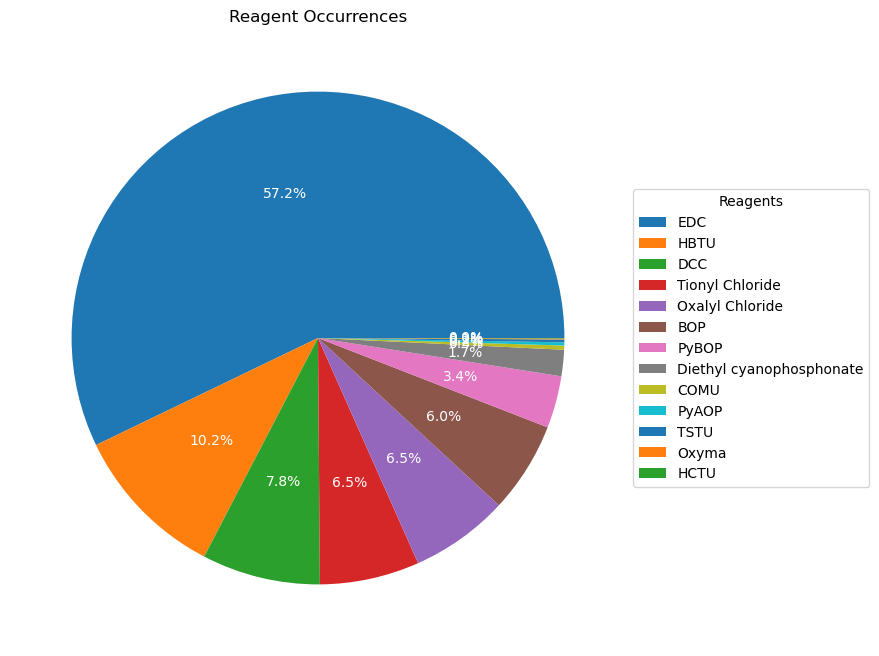

[['BOP', 60.10347276687622],
 ['COMU', 49.064000282287594],
 ['DCC', 58.22139859733048],
 ['Diethyl cyanophosphonate', 63.01930801823454],
 ['EDC', 60.113161698435334],
 ['HBTU', 56.41843612067243],
 ['HCTU', 45.36666615804037],
 ['Oxalyl Chloride', 56.27826891426279],
 ['Oxyma', 62.55000114440918],
 ['PyAOP', 48.868420801664655],
 ['PyBOP', 56.58911110288094],
 ['TSTU', 65.5823528065401],
 ['Tionyl Chloride', 62.096063173490506]]

In [30]:
reagent_counts = df_temp['Reagent'].value_counts()

# Calculate mean yield for each reagent
mean_yields = df_temp.groupby('Reagent')['Yield'].mean()

# Plot the circular diagram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(reagent_counts, autopct='%1.1f%%', textprops=dict(color="w"))

# Add legend
ax.legend(wedges, reagent_counts.index, title="Reagents", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title('Reagent Occurrences')

plt.show()

# Mean yields
mean_yields_list = mean_yields.reset_index().values.tolist()
mean_yields_list


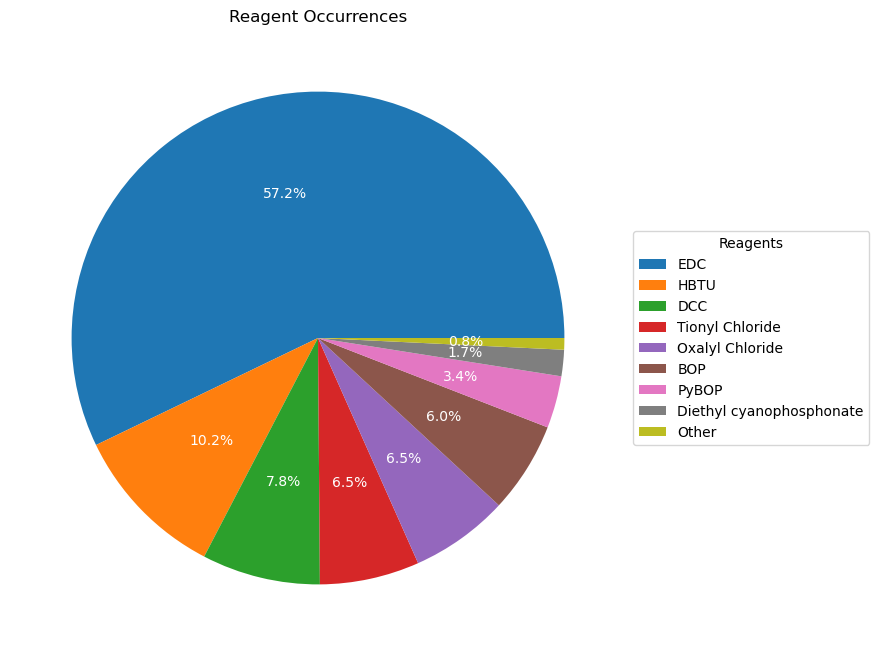

[['BOP', 60.10347276687622],
 ['DCC', 58.22139859733048],
 ['Diethyl cyanophosphonate', 63.01930801823454],
 ['EDC', 60.113161698435334],
 ['HBTU', 56.41843612067243],
 ['Oxalyl Chloride', 56.27826891426279],
 ['PyBOP', 56.58911110288094],
 ['Tionyl Chloride', 62.096063173490506],
 ['Other', 54.02000007629395]]

In [31]:
reagent_counts = df_temp['Reagent'].value_counts()

# Combine less frequent reagents into 'Other' if they constitute less than 1% of the total
threshold = 0.01 * len(df_temp)  # less than 1% of the total number of rows
reagent_counts_combined = reagent_counts.copy()
reagent_counts_combined[reagent_counts < threshold] = 0
reagent_counts_combined = reagent_counts_combined[reagent_counts_combined > 0]
reagent_counts_combined['Other'] = reagent_counts[reagent_counts < threshold].sum()

# Plot the circular diagram with combined 'Other' category
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(reagent_counts_combined, autopct='%1.1f%%', textprops=dict(color="w"))

# Add legend
ax.legend(wedges, reagent_counts_combined.index, title="Reagents", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add title
plt.title('Reagent Occurrences')

plt.show()

# Update mean yields calculation to include 'Other'
mean_yields_combined = df_temp[df_temp['Reagent'].isin(reagent_counts_combined.index)].groupby('Reagent')['Yield'].mean()
mean_yields_combined['Other'] = df_temp[~df_temp['Reagent'].isin(reagent_counts_combined.index)]['Yield'].mean()

# Mean yields
mean_yields_list_combined = mean_yields_combined.reset_index().values.tolist()
mean_yields_list_combined

In [ ]:
def filter_deoxofluronation_reactions(df, target_smiles):
    reactions_data = []
    # Split the target_smiles into components, assuming they are split by '.' for salts
    target_components = [Chem.CanonSmiles(sm) for sm in target_smiles.split('.')]
    
    for index, row in df.iterrows():
        reaction_rdkit = AllChem.ReactionFromSmarts(row["ReactionSmilesClean"])
        reactant_templates = [
            Chem.CanonSmiles(Chem.MolToSmiles(reaction_rdkit.GetReactantTemplate(i)))
            for i in range(reaction_rdkit.GetNumReactantTemplates())
        ]
        
        # Check if all components of the target are in the reactants
        if all(component in reactant_templates for component in target_components):
            reactions_data.append({
                'ID': row['ID'],
                'ReactionSmiles': row['ReactionSmiles'],
                'Year': row['Year'],
                'Yield': row['Yield'],
                'Reagent': target_smiles  # Join the components for display
            })
    if len(reactions_data) == 0:
        return
    reactions_df = pd.DataFrame(reactions_data)
    print(f"Complete, found {len(reactions_data)} reactions with the targeted SMILES")
    return reactions_df

def process_data (df, lst_smiles_reagent):
    lst_reagents = []
    for reagent_smiles in lst_smiles_reagent:
        df_reagent = filter_deoxofluronation_reactions(df, reagent_smiles)
        lst_reagents.append(df_reagent)
    return lst_reagents

def return_remaining_reaction (original_df, processed_df_lst):
    remaining_df = original_df.copy() 
    for df in processed_df_lst:
        remaining_df = remaining_df[~remaining_df['ID'].isin(df['ID'])]
    print(remaining_df.shape)
    return remaining_df


def remove_atom_mapping(rxn):
    """
    Remove mapping indices from all atoms in all reactant templates of the reaction.
    """
    for reactant_template in range(rxn.GetNumReactantTemplates()):
        mol = rxn.GetReactantTemplate(reactant_template)
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(0)
    for product_template in range(rxn.GetNumProductTemplates()):
        mol = rxn.GetProductTemplate(product_template)
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(0)
    for agent_template in range(rxn.GetNumAgentTemplates()):
        mol = rxn.GetAgentTemplate(agent_template)
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(0)

def split_smiles(smiles):
    """Split a SMILES string into individual components if it's a salt."""
    return smiles.split('.')

def get_molecular_mass(smiles):
    """Calculate the molecular mass of a SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.ExactMolWt(mol)
    return 0

def canonical_smiles(smiles):
    """Generate a canonical SMILES string from a given SMILES string, safely handling errors."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return rdkit.Chem.rdMolDescriptors.CalcExactMolWt(mol)
    return None

def find_substrate_in_df(df):
    substrate_smiles_list = []
    substrate_mass_list = []
    for idx, row in df.iterrows():
        reaction_rdkit = AllChem.ReactionFromSmarts(row["ReactionSmiles"])
        reactants_mapped = [reaction_rdkit.GetReactantTemplate(i) for i in range(reaction_rdkit.GetNumReactantTemplates())]
        reactant_lst = []
        for reactant in reactants_mapped:
            # Reset mapping for all atoms in this reactant
            for atom in reactant.GetAtoms():
                atom.SetAtomMapNum(0)
            # Convert to SMILES after resetting mapping
            reactant_smiles = Chem.MolToSmiles(reactant, isomericSmiles=True)
            reactant_lst.append(reactant_smiles)    
        known_reagents = split_smiles(row['Reagent'])  # Assumes known reagents could be salts  
        expanded_reagents = []
        for reagent in known_reagents:
            expanded_reagents.extend([Chem.CanonSmiles(r) for r in split_smiles(reagent) if Chem.CanonSmiles(r)])

        filtered_reactants = [Chem.CanonSmiles(comp) for comp in reactant_lst if Chem.CanonSmiles(comp) not in expanded_reagents]
        
        # Calculate molecular masses and identify the substrate
        valid_components = [(comp, get_molecular_mass(comp)) for comp in filtered_reactants if canonical_smiles(comp)]
        if valid_components:
            substrate = max(valid_components, key=lambda x: x[1])
            substrate_smiles_list.append(Chem.CanonSmiles(substrate[0]))
            substrate_mass_list.append(substrate[1])
        else:
            substrate_smiles_list.append(None)
            substrate_mass_list.append(0)

    # Update the DataFrame with new columns for substrate SMILES and mass
    df['Substrate Smiles'] = substrate_smiles_list
    df['Substrate MW'] = substrate_mass_list
    return df

def display_substrates(df, smiles_column='Substrate Smiles'):
    """Display the substrate molecules from the DataFrame column specified."""
    substrate_smiles_list = df[smiles_column].dropna()

    for smiles in substrate_smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            img = Draw.MolToImage(mol)
            display(img) 

def Lipinsky_rule (dataframe):
   rule_lst = []
   for idx, row in dataframe.iterows():
        logP = row["MolLogP"]
        Hbond_Donor = row["NumHDonors"]
        Hbond_Acceptor = row["NumHAcceptors"]
        MolarW = row["Substrate MW"]
        rule_1 = Hbond_Donor <= 5
        rule_2 = Hbond_Acceptor <= 10
        rule_3 = MolarW < 500.0
        rule_4 = logP <= 5.0
        if rule_1 and rule_2 and rule_3 and rule_4 == True:
            rule_lst.append[True]

def all_descriptors(dataframe):
    # Initialize lists to hold descriptors for each row
    tpsa_list = []
    max_abs_partial_charge_list = []
    max_partial_charge_list = []
    min_abs_partial_charge_list = []
    min_partial_charge_list = []
    fraction_csp3_list = []
    num_aliphatic_carbocycles_list = []
    num_aliphatic_heterocycles_list = []
    num_aromatic_carbocycles_list = []
    num_aromatic_heterocycles_list = []
    num_h_acceptors_list = []
    num_h_donors_list = []
    num_heteroatoms_list = []
    num_rotatable_bonds_list = []
    mol_log_p_list = []
    chi1_list = []
    HallKierAlpha_list = []
    for idx, row in dataframe.iterrows():
        smiles_substrate = row["Substrate Smiles"]
        mol = Chem.MolFromSmiles(smiles_substrate)
        if mol is None:
            # Handle cases where the SMILES string is invalid
            tpsa_list.append(None)
            max_abs_partial_charge_list.append(None)
            max_partial_charge_list.append(None)
            min_abs_partial_charge_list.append(None)
            min_partial_charge_list.append(None)
            fraction_csp3_list.append(None)
            num_aliphatic_carbocycles_list.append(None)
            num_aliphatic_heterocycles_list.append(None)
            num_aromatic_carbocycles_list.append(None)
            num_aromatic_heterocycles_list.append(None)
            num_h_acceptors_list.append(None)
            num_h_donors_list.append(None)
            num_heteroatoms_list.append(None)
            num_rotatable_bonds_list.append(None)
            mol_log_p_list.append(None)
            chi1_list.append(None)
            continue

        # Sanitize the molecule
        Chem.SanitizeMol(mol)

        # Calculate each descriptor
        tpsa_list.append(rdMolDescriptors.CalcTPSA(mol))
        max_abs_partial_charge_list.append(Descriptors.MaxAbsPartialCharge(mol))
        max_partial_charge_list.append(Descriptors.MaxPartialCharge(mol))
        min_abs_partial_charge_list.append(Descriptors.MinAbsPartialCharge(mol))
        min_partial_charge_list.append(Descriptors.MinPartialCharge(mol))
        fraction_csp3_list.append(Lipinski.FractionCSP3(mol))
        num_aliphatic_carbocycles_list.append(Lipinski.NumAliphaticCarbocycles(mol))
        num_aliphatic_heterocycles_list.append(Lipinski.NumAliphaticHeterocycles(mol))
        num_aromatic_carbocycles_list.append(Lipinski.NumAromaticCarbocycles(mol))
        num_aromatic_heterocycles_list.append(Lipinski.NumAromaticHeterocycles(mol))
        num_h_acceptors_list.append(Lipinski.NumHAcceptors(mol))
        num_h_donors_list.append(Lipinski.NumHDonors(mol))
        num_heteroatoms_list.append(Lipinski.NumHeteroatoms(mol))
        num_rotatable_bonds_list.append(Lipinski.NumRotatableBonds(mol))
        mol_log_p_list.append(Crippen.MolLogP(mol))
        chi1_list.append(GraphDescriptors.Chi1(mol))
        HallKierAlpha_list.rdkit.Chem.GraphDescriptors.HallKierAlpha(mol)

    # Add the lists to the DataFrame as new columns
    dataframe["TPSA"] = tpsa_list
    dataframe["MaxAbsPartialCharge"] = max_abs_partial_charge_list
    dataframe["MaxPartialCharge"] = max_partial_charge_list
    dataframe["MinAbsPartialCharge"] = min_abs_partial_charge_list
    dataframe["MinPartialCharge"] = min_partial_charge_list
    dataframe["FractionCSP3"] = fraction_csp3_list
    dataframe["NumAliphaticCarbocycles"] = num_aliphatic_carbocycles_list
    dataframe["NumAliphaticHeterocycles"] = num_aliphatic_heterocycles_list
    dataframe["NumAromaticCarbocycles"] = num_aromatic_carbocycles_list
    dataframe["NumAromaticHeterocycles"] = num_aromatic_heterocycles_list
    dataframe["NumHAcceptors"] = num_h_acceptors_list
    dataframe["NumHDonors"] = num_h_donors_list
    dataframe["NumHeteroatoms"] = num_heteroatoms_list
    dataframe["NumRotatableBonds"] = num_rotatable_bonds_list
    dataframe["MolLogP"] = mol_log_p_list
    dataframe["Chi1"] = chi1_list
    dataframe["HallKierAlpha"] = HallKierAlpha_list

    return dataframe

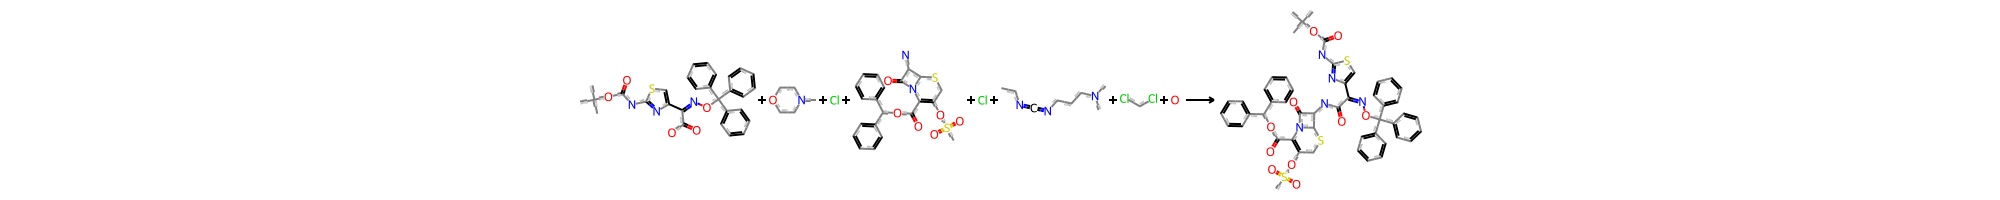

In [12]:
from rdkit.Chem import Draw, AllChem
from IPython.display import display

# Reset index to ensure standard integer indexing
df_Amide.reset_index(drop=True, inplace=True)

# Check if DataFrame is properly loaded and column exists
if "ReactionSmiles" in df_Amide.columns and not df_Amide.empty:
    # Extract the first reaction's SMARTS and create a reaction object
    reaction_smarts = df_Amide.loc[1, "ReactionSmilesClean"]
    mol = AllChem.ReactionFromSmarts(reaction_smarts)
    if mol:
        img = Draw.ReactionToImage(mol)
        display(img)
    else:
        print("Failed to create a molecular object from the provided SMARTS.")
else:
    print("DataFrame is empty or does not contain the 'ReactionSmiles' column")


In [30]:
import pandas as pd
import math
import os
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from IPython.display import display
import pandas as pd
import CGRtools
from CGRtools.files import SMILESRead, SDFWrite
from CGRtools.containers import MoleculeContainer, QueryContainer, QueryCGRContainer, ReactionContainer
from CGRtools.containers.bonds import DynamicBond
from CGRtools.periodictable import ListElement, DynamicQueryElement, DynamicQueryC
from pickle import loads, dumps
from joblib import Memory
import csv
import logging
smiles_parser = SMILESRead.create_parser(ignore=True)
reaction_smarts = df_Amide.loc[3, "ReactionSmiles"]
reaction = smiles_parser(reaction_smarts)
cgr = reaction.compose()
cgr.clean2d()
cgr

In [31]:
print(cgr)

CC(C)(C)OC(NC1=NC(C(=NOC)C([.>-]NC2C(=O)N3C(C(OC(C[=>-]4[->=]C[=>-]C[->=]C[=>-]C[->=]C[=>-]4)C[=>-]5[->=]C[=>-]C[->=]C[=>-]C[->=]C[=>-]5)=O)=C(CSC23)OS(=O)(=O)C)(=O)[->.]O)=CS1)=O.ClP(Cl)(OC=6C=CC=CC=6)=O.ClCCl.C7CN(CCO7)C.Cl


In [ ]:
def rdk_to_CGR(id_reaction_tuples):
    # Process each reaction tuple to convert to SMILES and then to CGR
    smiles_mapped_data = []
    CGRs = []
    smiles_parser = SMILESRead.create_parser(ignore=True)
    for reaction_id, rxn in id_reaction_tuples:
        try:
            reaction = smiles_parser(rdkit.Chem.rdChemReactions.ReactionToSmiles(rxn))
            smiles_mapped_data.append((reaction_id, reaction))
        except Exception as e:
            print(f"Error processing reaction ID {reaction_id}: {e}")
            continue
    for reaction_id, reaction_data in smiles_mapped_data:
        try: # Check if reaction_data is properly parsed
                cgr = reaction_data.compose()
                CGRs.append((reaction_id, cgr))
        except Exception as e:
            print(f"Error composing CGR for reaction ID {reaction_id}: {e}")
            continue
    return CGRs

In [1]:
    # Extract the first reaction's SMARTS and create a reaction object
reaction_smarts = df_new.loc[0, "ReactionSmilesClean"]
mol = AllChem.ReactionFromSmarts(reaction_smarts)

img = Draw.ReactionToImage(mol)
display(img)

NameError: name 'df_new' is not defined